In [1]:
import numpy as np
import pylab as plt
import networkx as nx

In [2]:
# map cell to cell, add circular cell to goal point
# points_list = [(..,..), ...]
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)] # orig
# points_list = [(0,6), (6,2), (2,5), (0,5), (0,3), (2,3), (1,4), (4,7), (5,1)]

We create a points-list map that represents each direction our bot can take. Using this format allows us to easily create complex graphs but also easily visualize everything with networkx graphs.

Our starting point is 0, our goal point is 7.

In [3]:
goal = 7

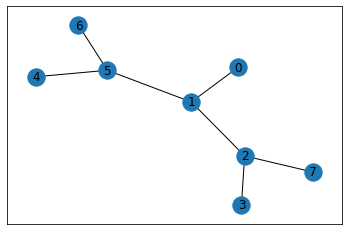

In [4]:
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

The map shows that point 0 is where our bot will start its journey and point 7 is it’s final goal. The extra added points and false paths are the obstacles the bot will have to contend with. If you look at the top image, we can weave a story into this search - our bot is looking for honey, it is trying to find the hive and avoid the factory (the story-line will make sense in the second half of the article).

We then create the rewards graph - this is the matrix version of our list of points map. We initialize the matrix to be the height and width of our points list (8 in this example) and initialize all values to -1:

In [5]:
# how many points in graph? x points
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

We then change the values to be 0 if it is a viable path and 100 if it is a goal path

In [7]:
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


In [8]:
R

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

To read the above matrix, the y-axis is the state or where your bot is currently located, and the x-axis is your possible next actions. We then build our Q-learning matrix which will hold all the lessons learned from our bot. The Q-learning model uses a transitional rule formula and gamma is the learning parameter (see Deep Q Learning for Video Games - The Math of Intelligence #9 for more details). The rest of this example is mostly copied from Mic’s blog post Getting AI smarter with Q-learning: a simple first step in Python.

In [9]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.9

initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):
    
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)
  
  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)
    
update(initial_state, action, gamma)

max_value 0.0


0

We keep following Mic’s blog and run the training and testing functions that will run the update function 700 times allowing the Q-learning model to figure out the most efficient path:

## Training

In [10]:
# Training
maxiter = 1400
scores  = []
for i in range(maxiter):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 90.0
Score: 190.0
max_value 90.0
Score: 280.0
max_value 0.0
Score: 280.0
max_value 0.0
Score: 280.0
max_value 0.0
Score: 280.0
max_value 0.0
Score: 280.0
max_value 0.0
Score: 280.0
max_value 90.0
Score: 280.0
max_value 0.0
Score: 280.0
max_value 0.0
Score: 280.0
max_value 90.0
Score: 280.0
max_value 90.0
Score: 370.0
max_value 0.0
Score: 370.0
max_value 81.0
Score: 451.0
max_value 90.0
Score: 451.0
max_value 81.0
Score: 532.0
max_value 0.0
Score: 532.0
max_value 0.0
Score: 532.0
max_value 0.0
Score: 532.0
max_value 0.0
Score: 532.0
max_value 0.0
Score: 532.0
max_value 90.0
Score: 532.0
max_value 81.0
Score: 613.0
max_value 81.0
Score: 613.0
max_value 90.0
Score: 613.0
max_value 90.0
Score: 613.0
max_value 81.0
Score: 694.0
max_value 81.0
Score: 694.0


Score: 1214.6832278097058
max_value 651.8955203440883
Score: 1214.6832278097058
max_value 996.5943714787114
Score: 1214.4011358367934
max_value 896.9349343308403
Score: 1214.5623426867357
max_value 896.9349343308403
Score: 1214.5623426867357
max_value 896.9349343308403
Score: 1214.5623426867357
max_value 896.9349343308403
Score: 1214.723549536678
max_value 807.2414408977563
Score: 1214.8686357016263
max_value 807.2414408977563
Score: 1214.8686357016263
max_value 805.7955203440882
Score: 1214.8686357016263
max_value 805.7955203440882
Score: 1214.8686357016263
max_value 805.7955203440882
Score: 1214.8686357016263
max_value 805.7955203440882
Score: 1214.8686357016263
max_value 805.7955203440882
Score: 1214.8686357016263
max_value 896.9349343308403
Score: 1214.8686357016263
max_value 807.2414408977563
Score: 1214.8686357016263
max_value 725.2159683096794
Score: 1214.9577002596056
max_value 725.2159683096794
Score: 1214.9577002596056
max_value 725.2159683096794
Score: 1214.9577002596056
max

## Testing

In [11]:
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

Most efficient path:
[0, 1, 2, 7]


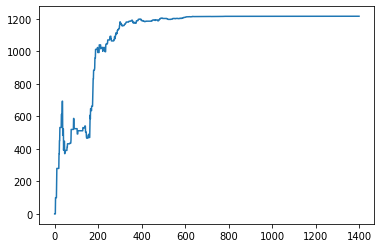

In [12]:
print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()

We see that the model did correctly find the most efficient path from the starting node 0 to the goal node 7 and took around ... iterations to converge to a solution (for learning parameter gamma = ...).